In [12]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
from fastai.imports import *
from fastai.structured import *

In [62]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from IPython.display import display

from sklearn import metrics

In [21]:
PATH = "data/bulldozer/"

In [22]:
!ls {PATH}

Data Dictionary.xlsx             TrainAndValid.csv
Machine_Appendix.csv             Valid 2.csv
Test.csv                         Valid.7z
Train.7z                         Valid.csv
Train.csv                        ValidSolution.csv
TrainAndValid 2.csv              median_benchmark.csv
TrainAndValid.7z                 random_forest_benchmark_test.csv


In [23]:
!head -2 data/bulldozer/Train.csv

SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
1139246,66000,999089,3157,121,3,2004,68,Low,11/16/2006 0:00,521D,521,D,,,,Wheel Loader - 110.0 to 120.0 Horsepower,Alabama,WL,Wheel Loader,,EROPS w AC,None or Unspecified,,None or Unspecified,,,,,,,,2 Valve,,,,,None or Unspecified,None or Unspecified,,,,,,,,,,,,,Standard,Conventional


In [63]:
df_raw = pd.read_csv('{PATH}Train.csv'.format(PATH=PATH), low_memory=False,
                    parse_dates=["saledate"])

In [25]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [26]:
# def display_all(df):
#     with pd.option_context("display.max_rows", 1000): 
#         with pd.option_context("display.max_columns", 1000):
#             display(df)

In [27]:
display_all(df_raw.tail().transpose())

,401120,401121,401122,401123,401124
SalesID,6333336,6333337,6333338,6333341,6333342
SalePrice,10500,11000,11500,9000,7750
MachineID,1840702,1830472,1887659,1903570,1926965
ModelID,21439,21439,21439,21435,21435
datasource,149,149,149,149,149
auctioneerID,1,1,1,2,2
YearMade,2005,2005,2005,2005,2005
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,2011-11-02 00:00:00,2011-11-02 00:00:00,2011-11-02 00:00:00,2011-10-25 00:00:00,2011-10-25 00:00:00


In [28]:
display_all(df_raw.describe(include='all').T)

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
SalesID,401125,NaN,NaN,NaN,NaN,NaN,1.91971e+06,909021,1.13925e+06,1.41837e+06,1.63942e+06,2.24271e+06,6.33334e+06
SalePrice,401125,NaN,NaN,NaN,NaN,NaN,31099.7,23036.9,4750,14500,24000,40000,142000
MachineID,401125,NaN,NaN,NaN,NaN,NaN,1.2179e+06,440992,0,1.0887e+06,1.27949e+06,1.46807e+06,2.48633e+06
ModelID,401125,NaN,NaN,NaN,NaN,NaN,6889.7,6221.78,28,3259,4604,8724,37198
datasource,401125,NaN,NaN,NaN,NaN,NaN,134.666,8.96224,121,132,132,136,172
auctioneerID,380989,NaN,NaN,NaN,NaN,NaN,6.55604,16.9768,0,1,2,4,99
YearMade,401125,NaN,NaN,NaN,NaN,NaN,1899.16,291.797,1000,1985,1995,2000,2013
MachineHoursCurrentMeter,142765,NaN,NaN,NaN,NaN,NaN,3457.96,27590.3,0,0,0,3025,2.4833e+06
UsageBand,69639,3,Medium,33985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
saledate,401125,3919,2009-02-16 00:00:00,1932,1989-01-17 00:00:00,2011-12-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
df_raw.SalePrice = np.log(df_raw.SalePrice)

In [30]:
regressor = RandomForestRegressor(n_jobs=4, n_estimators=10)

In [31]:
X = df_raw.drop('SalePrice', axis=1)
y = df_raw.SalePrice

In [32]:
regressor.fit(X, y)

ValueError: could not convert string to float: 'Low'

In [33]:
X.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,521D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,950FII,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,226,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,PC120-6E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,S175,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
fld = df_raw.saledate
fld.dt.year

0         2006
1         2004
2         2004
3         2011
4         2009
5         2008
6         2004
7         2005
8         2009
9         2007
10        2008
11        2006
12        2005
13        2006
14        2006
15        2006
16        2007
17        2010
18        2006
19        2005
20        2006
21        2006
22        2007
23        2006
24        2004
25        2006
26        2006
27        2007
28        2007
29        2006
          ... 
401095    2011
401096    2011
401097    2011
401098    2011
401099    2011
401100    2011
401101    2011
401102    2011
401103    2011
401104    2011
401105    2011
401106    2011
401107    2011
401108    2011
401109    2011
401110    2011
401111    2011
401112    2011
401113    2011
401114    2011
401115    2011
401116    2011
401117    2011
401118    2011
401119    2011
401120    2011
401121    2011
401122    2011
401123    2011
401124    2011
Name: saledate, Length: 401125, dtype: int64

In [35]:
add_datepart(df_raw, 'saledate')
df_raw.saleYear.head()

0    2006
1    2004
2    2004
3    2011
4    2009
Name: saleYear, dtype: int64

In [36]:
def train_cats(df):
    for n,c in df.items():
        if is_string_dtype(c): 
            df[n] = c.astype('category').cat.as_ordered()

In [37]:
train_cats(df_raw)

In [38]:
def is_string_dtype(arr_or_dtype):
    if arr_or_dtype is None:
        return False
    try:
        dtype = arr_or_dtype.dtype
        return dtype.kind in ('O', 'S', 'U') and not is_period_dtype(dtype)
    except TypeError:
        return False

In [39]:
from pandas.api.types import is_period_dtype

In [40]:
df_raw.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,saleDay,saleDayofweek,saleDayofyear,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,saleElapsed
0,1139246,11.097410,999089,3157,121,3.0,2004,68.0,Low,521D,...,16,3,320,False,False,False,False,False,False,1163635200
1,1139248,10.950807,117657,77,121,3.0,1996,4640.0,Low,950FII,...,26,4,86,False,False,False,False,False,False,1080259200
2,1139249,9.210340,434808,7009,121,3.0,2001,2838.0,High,226,...,26,3,57,False,False,False,False,False,False,1077753600
3,1139251,10.558414,1026470,332,121,3.0,2001,3486.0,High,PC120-6E,...,19,3,139,False,False,False,False,False,False,1305763200
4,1139253,9.305651,1057373,17311,121,3.0,2007,722.0,Medium,S175,...,23,3,204,False,False,False,False,False,False,1248307200


In [41]:
df_raw.UsageBand.cat.categories

Index(['High', 'Low', 'Medium'], dtype='object')

In [42]:
df_raw.UsageBand.cat.set_categories(['High', 'Medium', 'Low'], ordered=True, inplace=True)

In [43]:
df_raw.UsageBand = df_raw.UsageBand.cat.codes

In [44]:
display_all(df_raw.isnull().sum().sort_index() / len(df_raw))

Backhoe_Mounting            0.803872
Blade_Extension             0.937129
Blade_Type                  0.800977
Blade_Width                 0.937129
Coupler                     0.466620
Coupler_System              0.891660
Differential_Type           0.826959
Drive_System                0.739829
Enclosure                   0.000810
Enclosure_Type              0.937129
Engine_Horsepower           0.937129
Forks                       0.521154
Grouser_Tracks              0.891899
Grouser_Type                0.752813
Hydraulics                  0.200823
Hydraulics_Flow             0.891899
MachineHoursCurrentMeter    0.644089
MachineID                   0.000000
ModelID                     0.000000
Pad_Type                    0.802720
Pattern_Changer             0.752651
ProductGroup                0.000000
ProductGroupDesc            0.000000
ProductSize                 0.525460
Pushblock                   0.937129
Ride_Control                0.629527
Ripper                      0.740388
S

In [45]:
import os

In [46]:
!ls tmp/

bulldozer-raw raw_groceries


In [47]:
os.makedirs('tmp', exist_ok=True)
df_raw.to_feather('tmp/bulldozer-raw')

In [48]:
# df = pd.read_feather('tmp/bulldozer-raw', nthreads=1)

In [49]:
import feather

In [50]:
df_raw = feather.read_dataframe('tmp/bulldozer-raw')

In [51]:
df_raw.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,saleDay,saleDayofweek,saleDayofyear,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,saleElapsed
0,1139246,11.097410,999089,3157,121,3.0,2004,68.0,2,521D,...,16,3,320,False,False,False,False,False,False,1163635200
1,1139248,10.950807,117657,77,121,3.0,1996,4640.0,2,950FII,...,26,4,86,False,False,False,False,False,False,1080259200
2,1139249,9.210340,434808,7009,121,3.0,2001,2838.0,0,226,...,26,3,57,False,False,False,False,False,False,1077753600
3,1139251,10.558414,1026470,332,121,3.0,2001,3486.0,0,PC120-6E,...,19,3,139,False,False,False,False,False,False,1305763200
4,1139253,9.305651,1057373,17311,121,3.0,2007,722.0,1,S175,...,23,3,204,False,False,False,False,False,False,1248307200


In [57]:
rmse = lambda x, y: math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
           m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [52]:
df, y, nas = proc_df(df_raw, 'SalePrice')

In [53]:
regressor = RandomForestRegressor(n_jobs=4, n_estimators=10)

In [54]:
regressor.fit(df, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [55]:
regressor.score(df, y)

0.9831092079265703

In [59]:
def split_vals(a, n):
    return a[:n].copy(), a[n:].copy()

In [60]:
n_valid = 12000
n_trn = len(df) - n_valid
raw_train, raw_valid = split_vals(df_raw, n_trn)
X_train, X_valid = split_vals(df, n_trn)
y_train, y_valid = split_vals(y, n_trn)

X_train.shape, y_train.shape, X_valid.shape

((389125, 66), (389125,), (12000, 66))

In [61]:
m = RandomForestRegressor(n_jobs=-1, n_estimators=10)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 1min 18s, sys: 752 ms, total: 1min 19s
Wall time: 16.5 s
[0.09030907667143867, 0.24780057096777935, 0.9829549754864441, 0.8903389046747033]


In [50]:
df_raw.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,saleDay,saleDayofweek,saleDayofyear,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,saleElapsed
0,1139246,11.097410,999089,3157,121,3.0,2004,68.0,2,521D,...,16,3,320,False,False,False,False,False,False,1163635200
1,1139248,10.950807,117657,77,121,3.0,1996,4640.0,2,950FII,...,26,4,86,False,False,False,False,False,False,1080259200
2,1139249,9.210340,434808,7009,121,3.0,2001,2838.0,0,226,...,26,3,57,False,False,False,False,False,False,1077753600
3,1139251,10.558414,1026470,332,121,3.0,2001,3486.0,0,PC120-6E,...,19,3,139,False,False,False,False,False,False,1305763200
4,1139253,9.305651,1057373,17311,121,3.0,2007,722.0,1,S175,...,23,3,204,False,False,False,False,False,False,1248307200


In [ ]:
# Speeding Things Up

In [51]:
df_trn, y_trn, nas = proc_df(df_raw, 'SalePrice', subset=30000, na_dict=nas)
X_train, _ = split_vals(df_trn, 20000)
y_train, _ = split_vals(y_trn, 20000)

In [53]:
m = RandomForestRegressor(n_estimators=1, max_depth=3, bootstrap=False, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.529873533168427, 0.5805274075112051, 0.39389127008156577, 0.398142841493655]


In [ ]:
draw_tree(m.estimators_[0], df_trn, precision=3)

In [55]:
# draw_tree(m.estimators_[0], df_trn, precision=3)

In [56]:
m = RandomForestRegressor(n_estimators=1, bootstrap=False, 
                          n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[7.431033801933e-17, 0.45691854802615683, 1.0, 0.6271573809141635]


In [ ]:
# Bagging
"""
Bag of little Bootstraps
Bagging is an interesting idea which is what if we created five different models each of which was only somewhat predictive but the models gave predictions that were not correlated with each other
So this idea of averaging models is a technique for Ensembling
""";

In [57]:
m = RandomForestRegressor(n_jobs=-1, n_estimators=10) 
m.fit(X_train, y_train) 
print_score(m)

[0.11381381465597307, 0.3690853241283224, 0.9720362092316445, 0.7567227334119339]


In [58]:
preds = np.stack([t.predict(X_valid) for t in m.estimators_])
preds[:, 0], np.mean(preds[:, 0]), y_valid[0]

(array([9.10498, 9.3501 , 9.21034, 9.5819 , 8.92266, 9.6486 , 9.30565, 9.21034, 9.15905, 9.10498]),
 9.259859793114995,
 9.104979856318357)

In [59]:
preds.shape

(10, 12000)

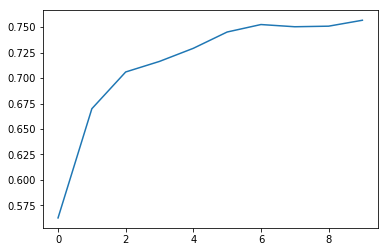

In [60]:
plt.plot([metrics.r2_score(y_valid, np.mean(preds[:i+1], axis=0)) for i in range(10)]);

In [61]:
m = RandomForestRegressor(n_jobs=-1, n_estimators=20) 
m.fit(X_train, y_train) 
print_score(m)

[0.10227712970342459, 0.3469707416473685, 0.9774179612828754, 0.7850023649354415]


In [63]:
??draw_tree

Signature: draw_tree(t, df, size=10, ratio=0.6, precision=0)
Source:   
def draw_tree(t, df, size=10, ratio=0.6, precision=0):
    """ Draws a representation of a random forest in IPython.

    Parameters:
    -----------
    t: The tree you wish to draw
    df: The data used to train the tree. This is used to get the names of the features.
    """
    s=export_graphviz(t, out_file=None, feature_names=df.columns, filled=True,
                      special_characters=True, rotate=True, precision=precision)
    IPython.display.display(graphviz.Source(re.sub('Tree {',
       f'Tree {{ size={size}; ratio={ratio}', s)))
File:      ~/projects/personal/ML/fastai/fastai/structured.py
Type:      function


In [ ]:
m = RandomForestRegressor(n_jobs=-1, n_estimators=40) 
m.fit(X_train, y_train) 
print_score(m)

In [ ]:
m = RandomForestRegressor(n_jobs=-1, n_estimators=80) 
m.fit(X_train, y_train) 
print_score(m)

In [ ]:
# Out of Bag score
# Sometimes your dataset will be small and you will not want to pull out a validation set because doing so means you now do not have enough data to build a good model. However, random forests have a very clever trick called out-of-bag (OOB) error which can handle this (and more!)

In [ ]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, 
                          oob_score=True)
m.fit(X_train, y_train)
print_score(m)

In [ ]:
df_trn, y_trn, nas = proc_df(df_raw, 'SalePrice')
X_train, X_valid = split_vals(df_trn, n_trn)
y_train, y_valid = split_vals(y_trn, n_trn)

In [ ]:
set_rf_samples(20000)

In [ ]:
m = RandomForestRegressor(n_estimators=10, n_jobs=-1, 
                          oob_score=True)
m.fit(X_train, y_train)
print_score(m)

In [ ]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, 
                          oob_score=True)
m.fit(X_train, y_train)
print_score(m)

In [ ]:
# reset_rf_samples()

In [69]:
?ProcessPoolExecutor

Init signature: ProcessPoolExecutor(max_workers=None)
Docstring:      This is an abstract base class for concrete asynchronous executors.
Init docstring:
Initializes a new ProcessPoolExecutor instance.

Args:
    max_workers: The maximum number of processes that can be used to
        execute the given calls. If None or not given then as many
        worker processes will be created as the machine has processors.
File:           ~/anaconda/lib/python3.6/concurrent/futures/process.py
Type:           type
Subclasses:     


In [ ]:
reset_rf_samples()
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, 
                          oob_score=True)
m.fit(X_train, y_train)
print_score(m)

In [ ]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, 
                          n_jobs=-1, oob_score=True) 
m.fit(X_train, y_train) 
print_score(m)

In [ ]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, 
                      max_features=0.5, n_jobs=-1, oob_score=True) 
m.fit(X_train, y_train) 
print_score(m)

In [ ]:
df_raw.fiProductClassDesc.cat.categories

### 3.2.1 One Step backward

The LSTM backward pass is slighltly more complicated than the forward one. We have provided you with all the equations for the LSTM backward pass below. (If you enjoy calculus exercises feel free to try deriving these from scratch yourself.) 

### 3.2.2 gate derivatives

$$d \Gamma_o^{\langle t \rangle} = da_{next}*\tanh(c_{next}) * \Gamma_o^{\langle t \rangle}*\left(1-\Gamma_o^{\langle t \rangle}\right)\tag{7}$$

$$d\widetilde{c}^{\langle t \rangle} = \left(dc_{next}*\Gamma_u^{\langle t \rangle}+ \Gamma_o^{\langle t \rangle}* (1-\tanh(c_{next})^2) * \Gamma_u^{\langle t \rangle} * da_{next} \right) * \left(1-\left(\widetilde c^{\langle t \rangle}\right)^2\right) \tag{8}$$

$$d\Gamma_u^{\langle t \rangle} = \left(dc_{next}*\widetilde{c}^{\langle t \rangle} + \Gamma_o^{\langle t \rangle}* (1-\tanh(c_{next})^2) * \widetilde{c}^{\langle t \rangle} * da_{next}\right)*\Gamma_u^{\langle t \rangle}*\left(1-\Gamma_u^{\langle t \rangle}\right)\tag{9}$$

$$d\Gamma_f^{\langle t \rangle} = \left(dc_{next}* c_{prev} + \Gamma_o^{\langle t \rangle} * (1-\tanh(c_{next})^2) * c_{prev} * da_{next}\right)*\Gamma_f^{\langle t \rangle}*\left(1-\Gamma_f^{\langle t \rangle}\right)\tag{10}$$

### 3.2.3 parameter derivatives 

$$ dW_f = d\Gamma_f^{\langle t \rangle} \begin{bmatrix} a_{prev} \\ x_t\end{bmatrix}^T \tag{11} $$
$$ dW_u = d\Gamma_u^{\langle t \rangle} \begin{bmatrix} a_{prev} \\ x_t\end{bmatrix}^T \tag{12} $$
$$ dW_c = d\widetilde c^{\langle t \rangle} \begin{bmatrix} a_{prev} \\ x_t\end{bmatrix}^T \tag{13} $$
$$ dW_o = d\Gamma_o^{\langle t \rangle} \begin{bmatrix} a_{prev} \\ x_t\end{bmatrix}^T \tag{14}$$

To calculate $db_f, db_u, db_c, db_o$ you just need to sum across the horizontal (axis= 1) axis on $d\Gamma_f^{\langle t \rangle}, d\Gamma_u^{\langle t \rangle}, d\widetilde c^{\langle t \rangle}, d\Gamma_o^{\langle t \rangle}$ respectively. Note that you should have the `keep_dims = True` option.

Finally, you will compute the derivative with respect to the previous hidden state, previous memory state, and input.

$$ da_{prev} = W_f^T d\Gamma_f^{\langle t \rangle} + W_u^T   d\Gamma_u^{\langle t \rangle}+ W_c^T d\widetilde c^{\langle t \rangle} + W_o^T d\Gamma_o^{\langle t \rangle} \tag{15}$$
Here, the weights for equations 15 are the first n_a, (i.e. $W_f = W_f[:,:n_a]$ etc...)

$$ dc_{prev} = dc_{next}*\Gamma_f^{\langle t \rangle} + \Gamma_o^{\langle t \rangle} * (1- \tanh(c_{next})^2)*\Gamma_f^{\langle t \rangle}*da_{next} \tag{16}$$
$$ dx^{\langle t \rangle} = W_f^T d\Gamma_f^{\langle t \rangle} + W_u^T  d\Gamma_u^{\langle t \rangle}+ W_c^T d\widetilde c^{\langle t \rangle} + W_o^T d\Gamma_o^{\langle t \rangle}\tag{17} $$
where the weights for equation 17 are from n_a to the end, (i.e. $W_f = W_f[:,n_a:]$ etc...)

**Exercise:** Implement `lstm_cell_backward` by implementing equations $7-17$ below. Good luck! :)